# KNN算法基本原理

**KNN（K-Nearest Neighbors）**是一种基于实例的监督学习算法，其核心思想是：给定一个训练数据集，对于新的输入实例，根据距离度量（如欧氏距离或曼哈顿距离）找出训练集中与其最相似的k个训练实例（即最近邻），然后基于这k个邻居的信息来预测新实例的标签。

KNN算法既可以用于分类问题，也可以用于回归问题：
- **分类任务**：对于一个新样本，找到其最近的 K 个邻居，根据这些邻居的多数类别决定其类别。
- **回归任务**：对最近的 K 个邻居的目标值取平均或加权平均作为预测值。

## KNN算法基本步骤

1. **存储训练数据**：将训练数据集的所有样本和标签存储起来。
2. **计算距离**：对于新样本，计算它与所有训练样本的距离（如欧氏距离）。
3. **选择 K 个最近邻**：根据距离排序，选择距离最小的 K 个样本。
4. **投票/平均**：
   - **分类**：统计 K 个邻居中最多出现的类别。
   - **回归**：对 K 个邻居的目标值取平均或加权平均。

## KNN算法优缺点
### 优点
- **简单易懂：** KNN算法的原理简单，容易理解和实现。

### 缺点
- **计算成本高：** 对于大型数据集，计算每个点与新实例之间的距离可能非常耗时。
- **对噪声和异常值敏感：** KNN会受到噪声和异常值的影响，因为它们对距离非常敏感。
- **需要特征标准化**：距离对尺度敏感。
- **内存消耗大**：需存储全部训练数据。

# 分类问题——KNeighborsClassifier算法

## KNeighborsClassifier

  - `n_neighbors`: 用于指定 KNN 中的 K值，也即最近邻居的数量。
  - `weights`: 决定如何加权每个邻居对预测的影响
    - `uniform`: 所有邻居的权重相等（默认）。
    - `distance`: 邻居距离越近，权重越大。
    - `callable`: 自定义权重计算方式。
  - `metric`: 距离度量方法。
    - `minkowski`: 闵可夫斯基距离（默认）。
    - `euclidean`: 欧几里得距离。
    - `manhattan`: 曼哈顿距离。
  - `n_jobs`: 指定并行计算时的工作核心数。

## 泰坦尼克数据集

**titanic 数据集**包含了 891 条乘客记录，每条记录描述了乘客的个人信息及其在 Titanic 号上的生存情况
- survived：生存情况（0 = 未生还, 1 = 生还）
- pclass：乘客舱等级（1 = 一等舱, 2 = 二等舱, 3 = 三等舱）
- sex：乘客性别（male = 男性, female = 女性）
- age：乘客年龄（float，部分缺失值）
- sibsp：乘客在船上的兄弟姐妹或配偶数量（整数）
- parch：乘客在船上的父母或子女数量（整数）
- fare：乘客支付的票价（float）
- embarked：乘客登船港口（C = 瑟堡, Q = 皇后镇, S = 南安普敦）
- class：舱等级（文本版本的 pclass，First = 头等舱, Second = 二等舱, Third = 三等舱）
- who：乘客身份（man = 成年男性, woman = 成年女性, child = 儿童）
- adult_male：是否为成年男性（True = 是, False = 否）
- deck：乘客所在的甲板（A, B, C, D, E, F, G，部分缺失值较多）
- embark_town：乘客登船的城市（Cherbourg = 瑟堡, Queenstown = 皇后镇, Southampton = 南安普敦）
- alone：是否独自旅行（True = 独自旅行，False = 有亲属同行，对应 sibsp + parch == 0）

In [1]:
# 导入所需的库
import seaborn as sns  # 用于加载内置数据集
import warnings  # 用于忽略警告信息
warnings.filterwarnings('ignore')  # 忽略警告信息，防止冗长的警告输出
from sklearn.neighbors import KNeighborsClassifier # KNN算法模型
from sklearn.model_selection import train_test_split  # 数据集划分工具
from sklearn.preprocessing import StandardScaler  # 数据标准化
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc  # 用于计算准确率，混淆矩阵等
import matplotlib.pyplot as plt  # 用于绘制图表
import seaborn as sns  # 用于绘制更美观的图表

# 加载seaborn内置的泰坦尼克数据集
df = sns.load_dataset('titanic')

# 填充 'age' 列的缺失值：使用该列的中位数填充缺失值
df['age'].fillna(df['age'].median(), inplace=True)
# 填充 'embarked' 列的缺失值：使用该列的众数填充缺失值
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)
# 将 'sex' 列转化为数值：'male' 映射为 1，'female' 映射为 0
df['sex'] = df['sex'].map({'male': 1, 'female': 0})
# 将 'embarked' 列转化为数值：'C' 映射为 0，'Q' 映射为 1，'S' 映射为 2
df['embarked'] = df['embarked'].map({'C': 0, 'Q': 1, 'S': 2})

df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,2,Third,man,True,NaN,Southampton,no,False
1,1,1,0,38.0,1,0,71.2833,0,First,woman,False,C,Cherbourg,yes,False
2,1,3,0,26.0,0,0,7.9250,2,Third,woman,False,NaN,Southampton,yes,True
3,1,1,0,35.0,1,0,53.1000,2,First,woman,False,C,Southampton,yes,False
4,0,3,1,35.0,0,0,8.0500,2,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2,Second,man,True,NaN,Southampton,no,True
887,1,1,0,19.0,0,0,30.0000,2,First,woman,False,B,Southampton,yes,True
888,0,3,0,28.0,1,2,23.4500,2,Third,woman,False,NaN,Southampton,no,False
889,1,1,1,26.0,0,0,30.0000,0,First,man,True,C,Cherbourg,yes,True


## 代码实现

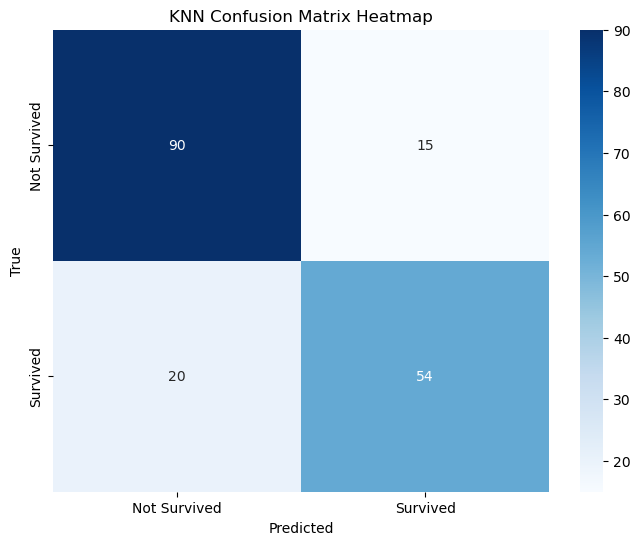

Classification Report:
              precision    recall  f1-score   support

           0     0.8182    0.8571    0.8372       105
           1     0.7826    0.7297    0.7552        74

    accuracy                         0.8045       179
   macro avg     0.8004    0.7934    0.7962       179
weighted avg     0.8035    0.8045    0.8033       179



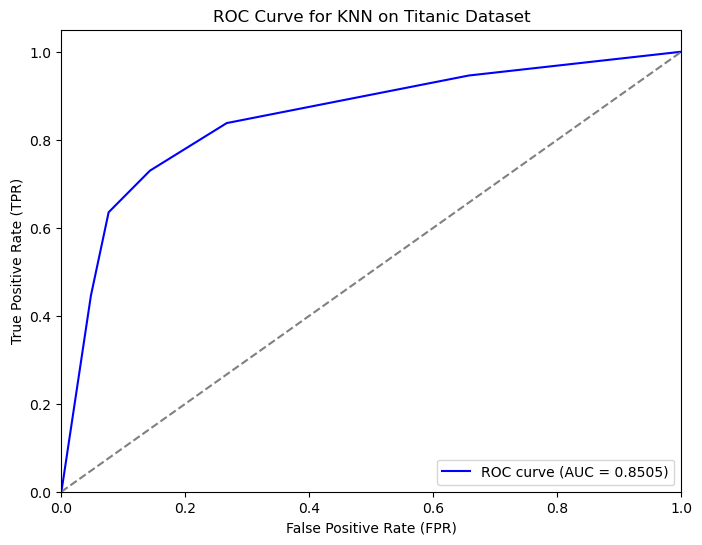

In [2]:
# 选择特征列（X）和目标列（y）
# 特征列： 'pclass'（舱位）, 'sex'（性别）, 'age'（年龄）, 'sibsp'（兄弟姐妹/配偶）, 
#         'parch'（父母/子女）, 'fare'（票价）, 'embarked'（登船港口）
# 目标列： 'survived'（是否生还，0=未生还，1=生还）
X = df[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']].dropna()
y = df['survived'].loc[X.index]  # 确保 y 和 X 对齐

# 数据集划分
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# KNN 对特征尺度敏感，需标准化
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # 计算训练集均值和标准差，并进行标准化
X_test_scaled = scaler.transform(X_test)  # 使用相同的均值和标准差标准化测试集

# 创建并训练 KNN 模型
# n_neighbors=5：K 值设为 5，即使用 5 个最近邻进行分类
# weights='uniform'：所有邻居的权重相同（默认）
knn_model = KNeighborsClassifier(n_neighbors=5)  # K=5
knn_model.fit(X_train_scaled, y_train)  # 训练模型

# 进行预测
y_probs = knn_model.predict_proba(X_test_scaled)[:, 1]  # 获取生还概率（第 2 列表示生还的概率）
y_pred = knn_model.predict(X_test_scaled)  # 获取分类预测结果（0 或 1）

# 混淆矩阵热力图
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Not Survived", "Survived"],  # x 轴标签（预测类别）
            yticklabels=["Not Survived", "Survived"])  # y 轴标签（真实类别）
plt.title("KNN Confusion Matrix Heatmap")  # 标题
plt.xlabel('Predicted')  # x 轴标签
plt.ylabel('True')  # y 轴标签
plt.show()

# **分类报告**
# precision（精准率）：预测为该类的样本中，真正属于该类的比例
# recall（召回率）：实际属于该类的样本中，被正确预测的比例
# f1-score：精准率和召回率的调和平均
# support：每个类别的真实样本数量
class_report = classification_report(y_test, y_pred, digits=4)
print("Classification Report:")
print(class_report)

# **ROC曲线**
# fpr（False Positive Rate）：假阳性率
# tpr（True Positive Rate）：真正率
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)  # 计算 AUC（曲线下面积）
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.4f})')  # 绘制 ROC 曲线
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # 添加对角线（随机分类的基准线）
plt.xlim([0.0, 1.0])  # 设置 x 轴范围
plt.ylim([0.0, 1.05])  # 设置 y 轴范围
plt.xlabel('False Positive Rate (FPR)')  # x 轴标签
plt.ylabel('True Positive Rate (TPR)')  # y 轴标签
plt.title('ROC Curve for KNN on Titanic Dataset')  # 标题
plt.legend(loc='lower right')  # 添加图例
plt.show()

# 回归问题——KNeighborsRegressor算法

## KNeighborsRegressor

  - `n_neighbors`: 用于指定 KNN 中的 K值，也即最近邻居的数量。
  - `weights`: 决定如何加权每个邻居对预测的影响
    - `uniform`: 所有邻居的权重相等（默认）。
    - `distance`: 邻居距离越近，权重越大。
    - `callable`: 自定义权重计算方式。
  - `metric`: 距离度量方法。
    - `minkowski`: 闵可夫斯基距离（默认）。
    - `euclidean`: 欧几里得距离。
    - `manhattan`: 曼哈顿距离。
  - `n_jobs`: 指定并行计算时的工作核心数。

## 波士顿房价数据集

**Boston Housing Dataset（波士顿房价数据集）**是一个回归数据集，该数据集包含506个样本，每个样本有13个特征，该数据集用于根据犯罪率、房屋房间数、空气污染等因素对波士顿地区的房价进行预测。

- MEDV：住房价格中位数（单位：千美元）
- CRIM：该镇的人均犯罪率
- ZN：住宅用地超过 25000 平方英尺的比例（%）
- INDUS：非零售商用土地比例（%）
- CHAS：是否靠近查尔斯河（1=是，0=否）
- NOX：一氧化氮浓度（空气污染指标，单位：ppm）
- RM：每栋住宅的平均房间数
- AGE：1940 年之前建成房屋的比例（%）
- DIS：到波士顿五个中心区域的加权距离
- RAD：距离高速公路的便利指数
- TAX：每 $10,000 资产的房产税率
- PTRATIO：城镇师生比例
- B：黑人比例指标
- LSTAT：低收入人群比例（%）

In [3]:
# 导入必要的库
import pandas as pd  # 用于数据处理
import numpy as np  # 用于数值计算
import matplotlib.pyplot as plt  # 用于绘图
import seaborn as sns  # 统计绘图库
from sklearn.datasets import fetch_openml  # 加载数据集
from sklearn.model_selection import train_test_split  # 数据集划分
from sklearn.neighbors import KNeighborsRegressor  # KNN回归
from sklearn.preprocessing import StandardScaler  # 数据标准化
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score  # 评估指标

# 加载波士顿房价数据集
# 该数据集包含506个样本，每个样本有13个特征，用于预测房价
boston = fetch_openml(name="boston", version=1, as_frame=True)
X = boston.data  # 特征变量
y = boston.target  # 目标变量（房价）
boston

{'data':         CRIM    ZN  INDUS CHAS    NOX     RM   AGE     DIS RAD    TAX  \
 0    0.00632  18.0   2.31    0  0.538  6.575  65.2  4.0900   1  296.0   
 1    0.02731   0.0   7.07    0  0.469  6.421  78.9  4.9671   2  242.0   
 2    0.02729   0.0   7.07    0  0.469  7.185  61.1  4.9671   2  242.0   
 3    0.03237   0.0   2.18    0  0.458  6.998  45.8  6.0622   3  222.0   
 4    0.06905   0.0   2.18    0  0.458  7.147  54.2  6.0622   3  222.0   
 ..       ...   ...    ...  ...    ...    ...   ...     ...  ..    ...   
 501  0.06263   0.0  11.93    0  0.573  6.593  69.1  2.4786   1  273.0   
 502  0.04527   0.0  11.93    0  0.573  6.120  76.7  2.2875   1  273.0   
 503  0.06076   0.0  11.93    0  0.573  6.976  91.0  2.1675   1  273.0   
 504  0.10959   0.0  11.93    0  0.573  6.794  89.3  2.3889   1  273.0   
 505  0.04741   0.0  11.93    0  0.573  6.030  80.8  2.5050   1  273.0   
 
      PTRATIO       B  LSTAT  
 0       15.3  396.90   4.98  
 1       17.8  396.90   9.14  
 2       

## 代码实现

### 代码与运行结果

MSE: 19.1167
RMSE: 4.3723
MAE: 2.5029
MAPE: 12.00%
R² Score: 0.7393


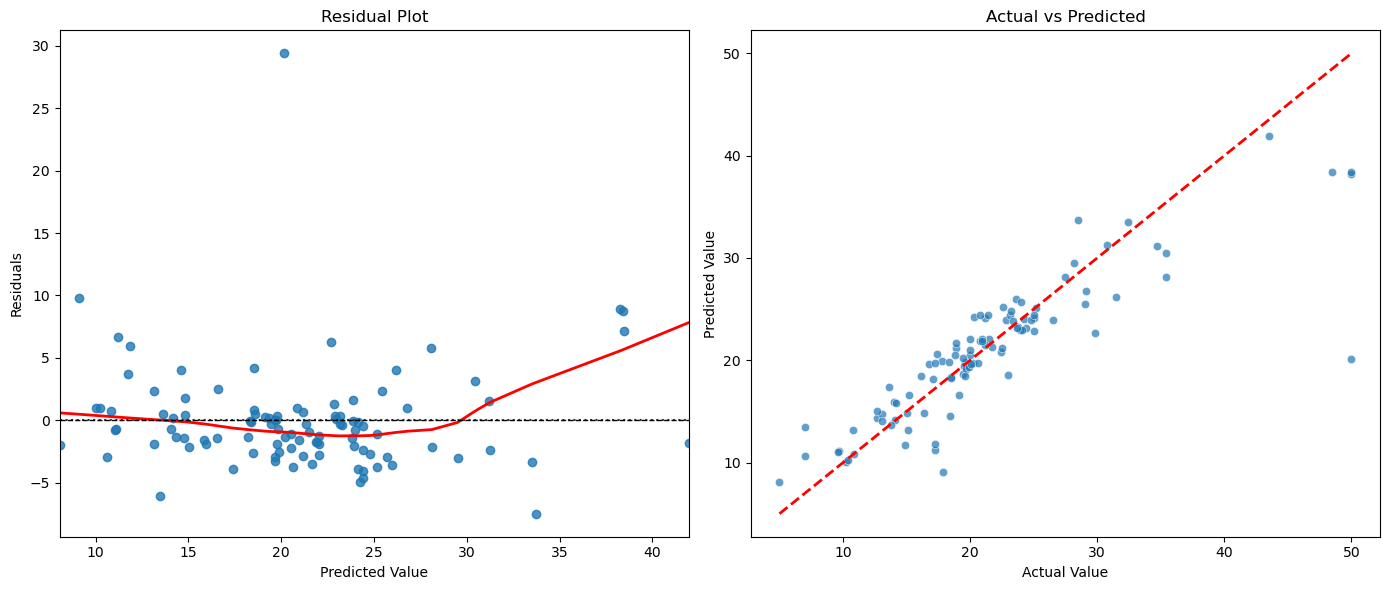

In [4]:
# 由于 KNN 对数据尺度敏感，我们对特征 X 和目标值 y 进行标准化
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_scaled = scaler_X.fit_transform(X)  # 标准化特征
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1)).ravel()  # 标准化目标变量

# 划分训练集和测试集，80% 训练集，20% 验证集
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# 定义 KNN 回归模型
knn_regressor = KNeighborsRegressor(n_neighbors=5, weights='distance')  # K=5, 根据距离加权

# 训练模型
knn_regressor.fit(X_train, y_train)

# 进行预测
y_pred_scaled = knn_regressor.predict(X_test)  # 预测的是标准化后的数据

# 逆变换回原始房价
y_test_original = scaler_y.inverse_transform(y_test.reshape(-1, 1)).ravel()
y_pred_original = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()

# 计算评估指标
mse = mean_squared_error(y_test_original, y_pred_original)  # 均方误差 (MSE)
rmse = np.sqrt(mse)  # 均方根误差 (RMSE)
mae = mean_absolute_error(y_test_original, y_pred_original)  # 平均绝对误差 (MAE)
mape = np.mean(np.abs((y_test_original - y_pred_original) / y_test_original)) * 100  # 平均绝对百分比误差 (MAPE)
r2 = r2_score(y_test_original, y_pred_original)  # R² 评分（拟合优度）

# 输出评估指标
print(f"MSE: {mse:.4f}")  # 均方误差
print(f"RMSE: {rmse:.4f}")  # 均方根误差
print(f"MAE: {mae:.4f}")  # 平均绝对误差
print(f"MAPE: {mape:.2f}%")  # 平均绝对百分比误差
print(f"R² Score: {r2:.4f}")  # R² 评分

# 计算残差
residuals = y_test_original - y_pred_original  # 真实值 - 预测值

# 创建双子图
plt.figure(figsize=(14, 6))  # 设定图像大小 (14, 6)

# 残差图 (Residual Plot)
plt.subplot(1, 2, 1)  # 创建第一个子图
sns.residplot(x=y_pred_original, y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 2})  # 低平滑线
plt.axhline(0, color='black', linestyle='--', linewidth=1)  # 添加 y=0 参考线
plt.xlabel("Predicted Value")  # 设置横轴标签
plt.ylabel("Residuals")  # 设置纵轴标签
plt.title("Residual Plot")  # 设置标题

# 实际值 vs 预测值图 (Actual vs Predicted Plot)
plt.subplot(1, 2, 2)  # 创建第二个子图
sns.scatterplot(x=y_test_original, y=y_pred_original, alpha=0.7)  # 真实值 vs 预测值散点图
plt.plot([min(y_test_original), max(y_test_original)], [min(y_test_original), max(y_test_original)], color='red', linestyle='--', linewidth=2)  # y = x 参考线
plt.xlabel("Actual Value")  # 设置横轴标签
plt.ylabel("Predicted Value")  # 设置纵轴标签
plt.title("Actual vs Predicted")  # 设置标题

# 调整子图间距并显示
plt.tight_layout()
plt.show()


### 结果分析

#### 残差图分析（Residual Plot）  
- **现象**：  
    - **残差集中分布**：蓝色散点密集分布在零线（残差=0）附近，预测值10-40区间内残差绝对值普遍<5，仅极少数点偏离至±10。  
    - **趋势线平稳**：红色曲线紧贴零线上下轻微波动，无显著上升/下降或弯曲趋势（如无“微笑”或“哭脸”形态）。  
    - **同方差性表现**：残差散布范围在不同预测值区间（如10-20 vs 30-40）宽度相近，未出现“漏斗形”扩散或收缩。  
- **结论**：  
    - **模型拟合效果优秀**：残差随机分布，未出现系统性偏差或异方差性，说明模型已捕捉数据中的主要规律（线性/非线性关系）。  
    - **局部噪声可控**：极端残差（如±10）样本量极少，可能为数据采集误差或特殊场景个案，整体对模型影响较小。  

#### 实际值 vs 预测值图分析（Actual vs Predicted）  
- **现象**：  
    - **强对齐性**：蓝色散点沿红色对角线（理想线）密集分布，横轴（实际值10-50）与纵轴（预测值10-50）匹配度高，多数点误差绝对值<5。 
    - **高价值区外推稳定**：实际值40-50的高预测区间（预测值40-50）散点仍贴近对角线，未出现明显偏离或离散。  
    - **无全局偏差**：散点在对角线上下对称分布，无整体高估（点集中在上方）或低估（点集中在下方）趋势。  

- **结论**：  
    - **预测精度可靠**：模型在低、中、高价值区间均表现稳定。  
    - **外推能力验证**：高价值区（实际值40-50）预测未失控，说明模型对数据分布外延具备合理泛化能力。  